### Here i have written some functions in SAS and added it's output screenshot. i have also added respective python code.

### 1) Import csv file in SAS
#### %macro importcsv(filepath=, outdata=, getnames=YES);

    /*Import CSV file*/
    PROC IMPORT DATAFILE="&filepath"
         OUT=&outdata
         DBMS=csv REPLACE;
         GETNAMES=&getnames;
    RUN;
    /*Print dataset*/
    PROC PRINT data=&outdata;
    RUN;
%mend;

%importcsv(filepath='/home/u63354880/store.csv', outdata=store, getnames=YES);

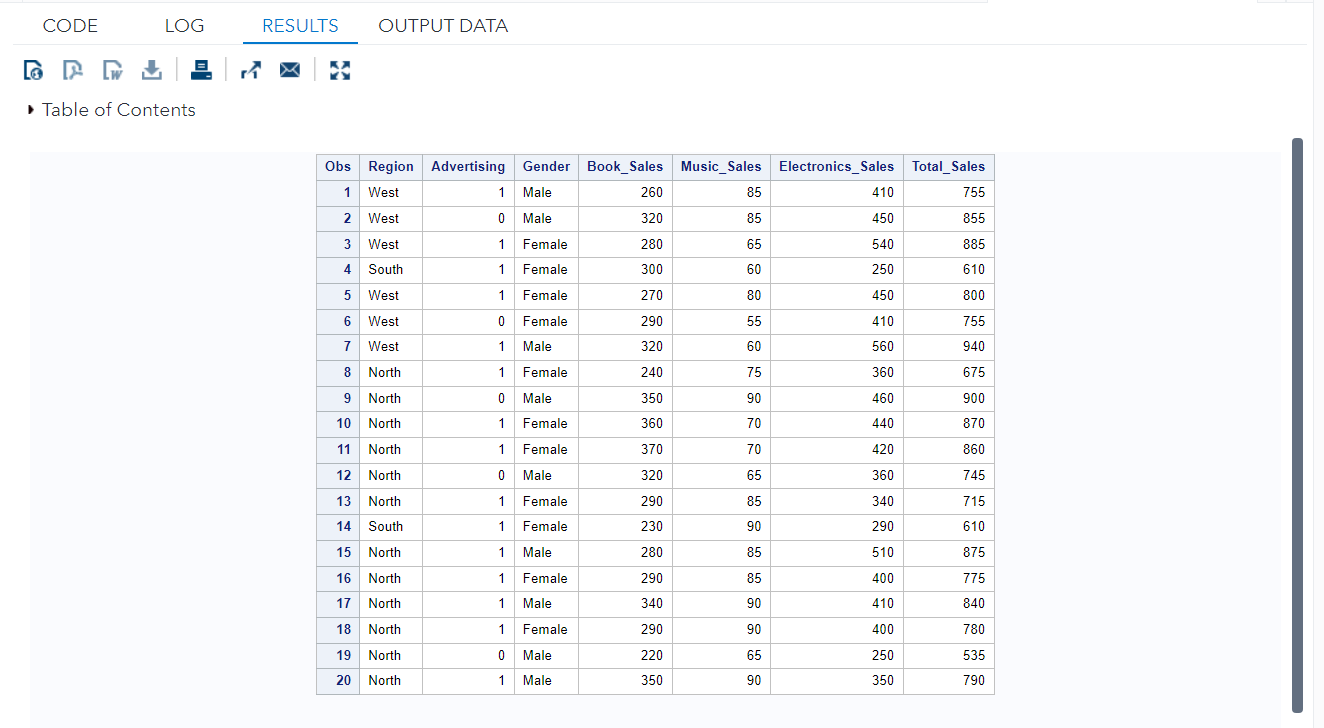

### 2) Create the scatter plot
#### %macro scatterplot(data=, xvar=, yvar=, groupvar=, plottype=sgplot);

    /*Set default plot type*/
    %if &plottype eq gplot %then %do;
        proc gplot data=&data;
        plot &yvar*&xvar;
    %end;
    %else %do;
        proc sgplot data=&data;
        scatter x=&xvar y=&yvar / makeattrs=(symbol=dot);
    %end;

    /*Add group variable if specified*/
    %if &groupvar ne %then %do;
        %if &plottype eq gplot %then %do;
            plot &yvar*&xvar=&groupvar;
            symbol1 color=red value=diamond;
            symbol2 color=blue value=circle;
            /*add more symbols for more groups*/
        %end;
        %else %do;
            scatter x=&xvar y=&yvar / group=&groupvar makeattrs=(symbol=trianglefilled);
            /*change symbol for more groups*/
        %end;
    %end;
    run;
    quit;
%mend;

/*Create scatter plot of Book_Sales vs. Music_Sales with gender as the grouping variable*/
%scatterplot(data=store, xvar=Book_Sales, yvar=Music_Sales, groupvar=Gender, plottype=sgplot);

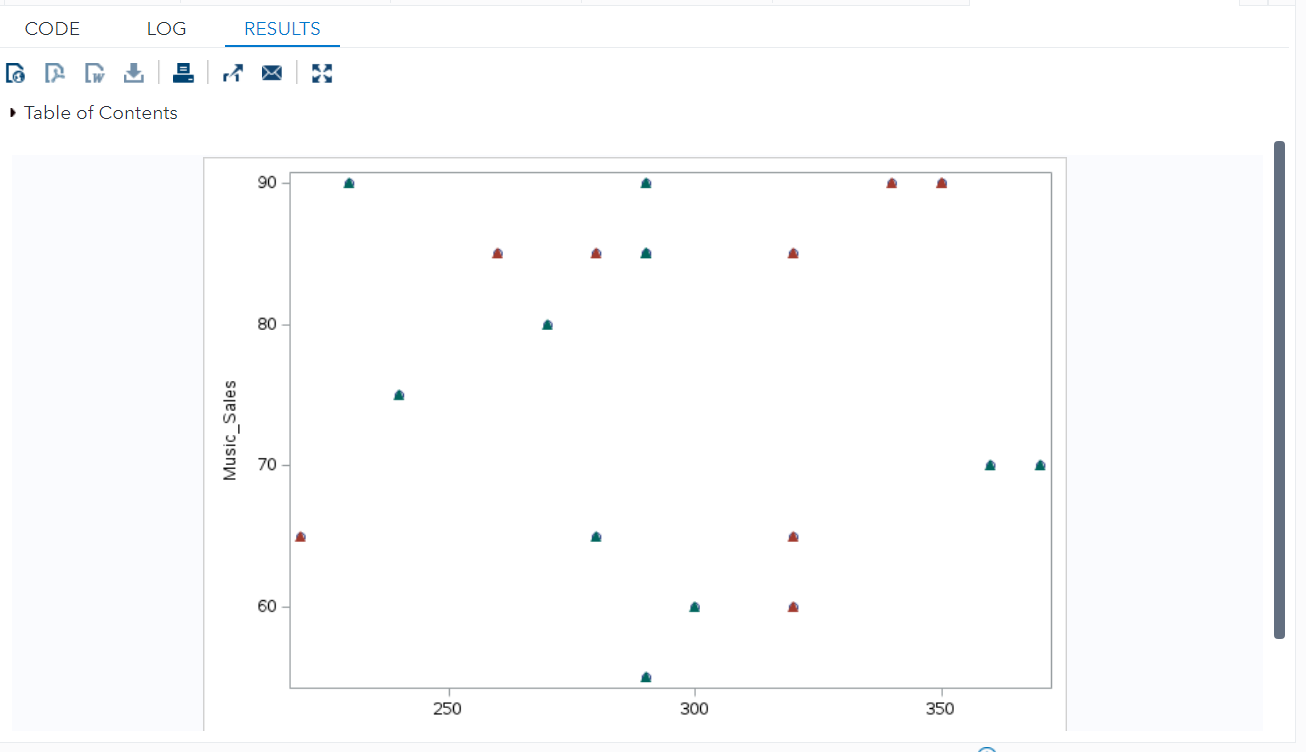

### 3) Create Histogram 
#### %macro histogram(data=, var=);
      proc sgplot data=&data;
	  histogram &var;
      run;
%mend;
 
%histogram(data=store, var=Music_Sales);

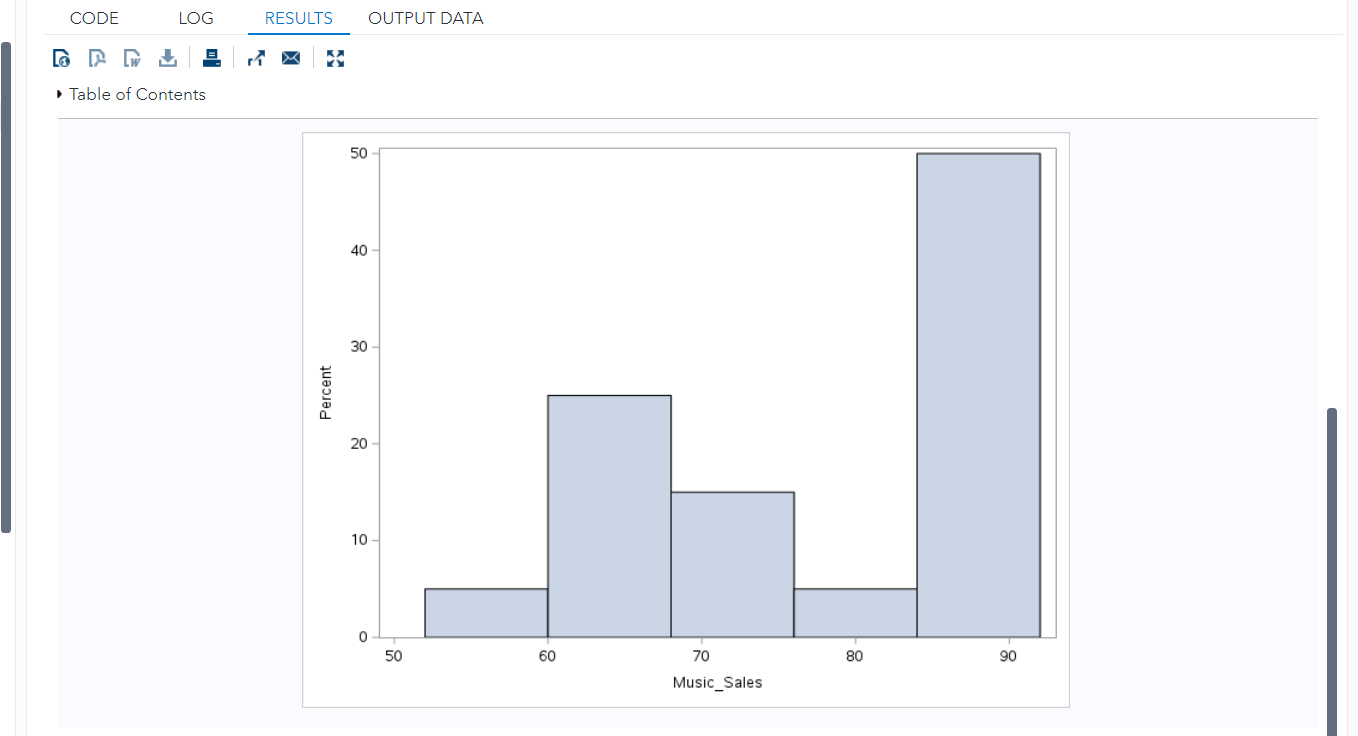

### 3) Create Probability plot
#### %macro probplot(data=, var=);
    proc univariate data=&data;
	var &var;
	probplot / normal(mu=est sigma=est);
    run;
%mend;

%probplot(data=store, var=Book_Sales);

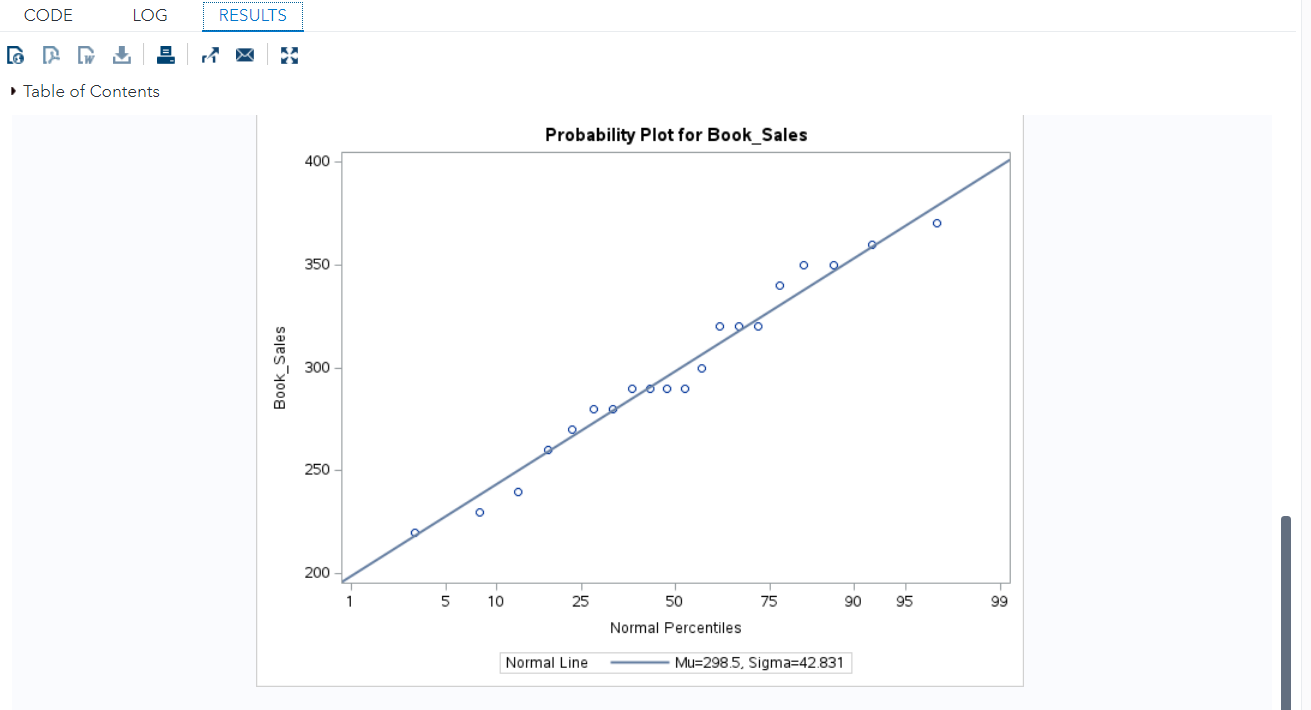

### 4) Create Box plot 
#### %macro boxplot(data=, var=);
      proc sgplot data=&data;
      vbox &var;
      run;
%mend;

%boxplot(data=store, var=Book_Sales);

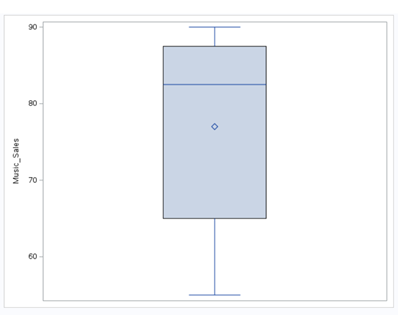


### 5) Create corelation matrix
#### %macro correlation_matrix(data=, varlist=);
	ods graphics on;
	title 'Compute Pearson Correlation Matrix';
	proc corr data=&data nosimple plots=matrix(histogram);
	var &varlist;
	run;
	ods graphics off;
%mend;

%correlation_matrix(data=exercise, varlist=Pushups Rest_Pulse Max_Pulse Run_Pulse Age)


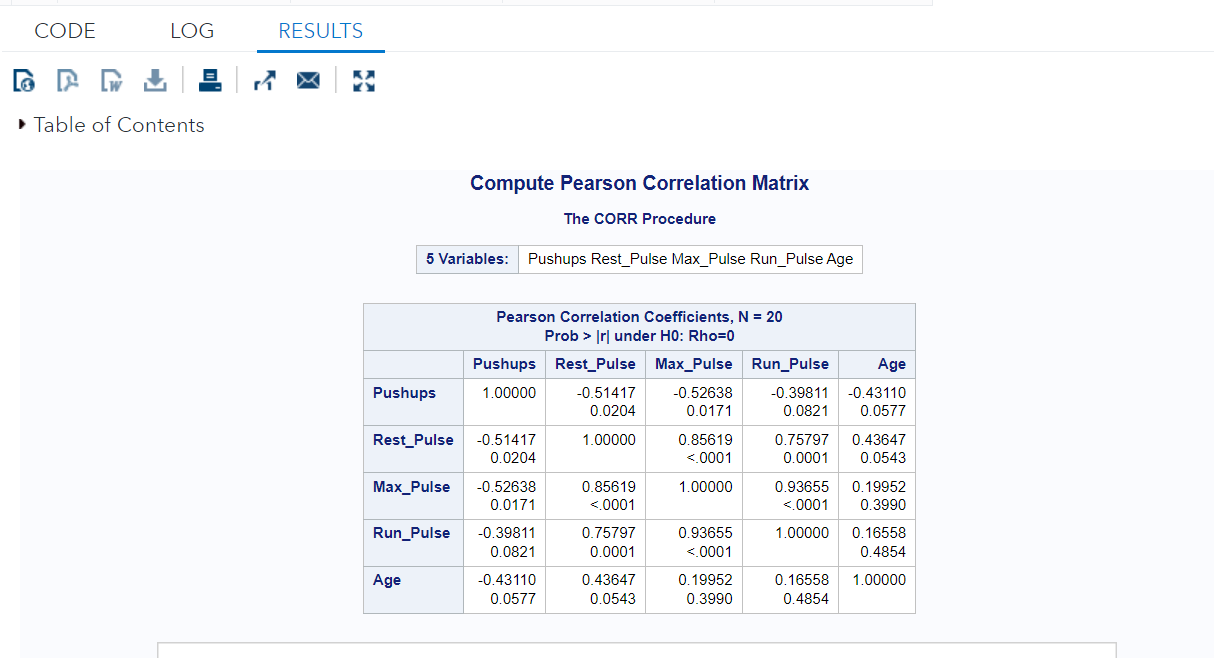

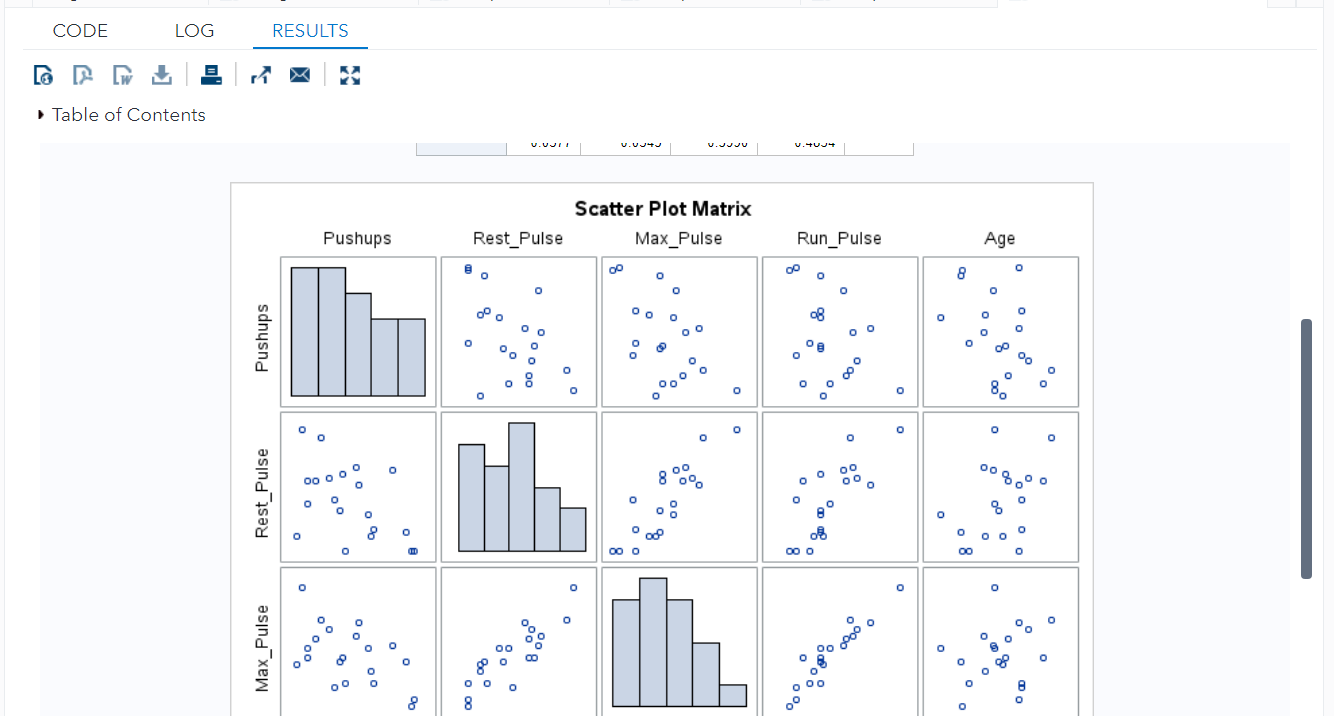

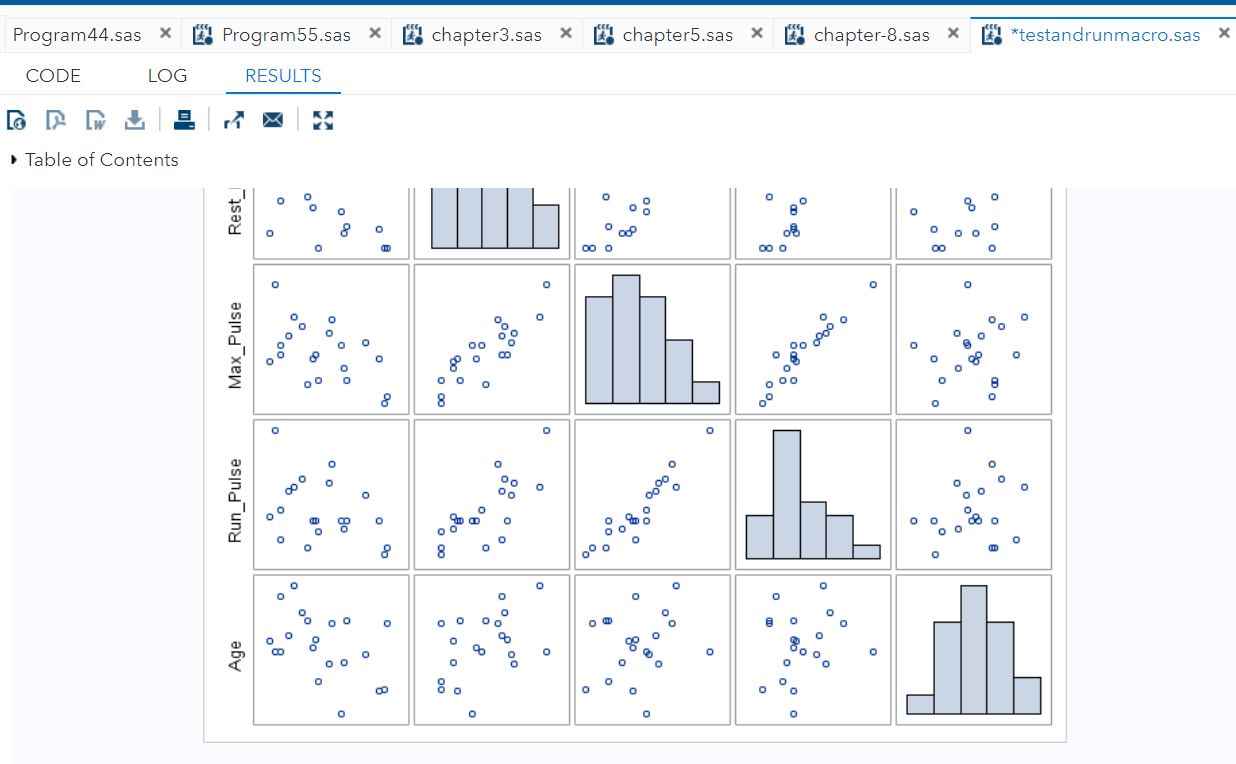

### 6) Create Linear regression model
#### %macro simple_linear_regression(data=, depvar=, indvars=);
      title 'A simple linear regression model';
      proc reg data=&data. plots(unpack)=diagnostics;
      model &depvar.= &indvars.;
      run;
      quit;
%mend;

%simple_linear_regression(data=exercise, depvar=Pushups, indvars= Rest_Pulse Age Max_Pulse Run_Pulse);

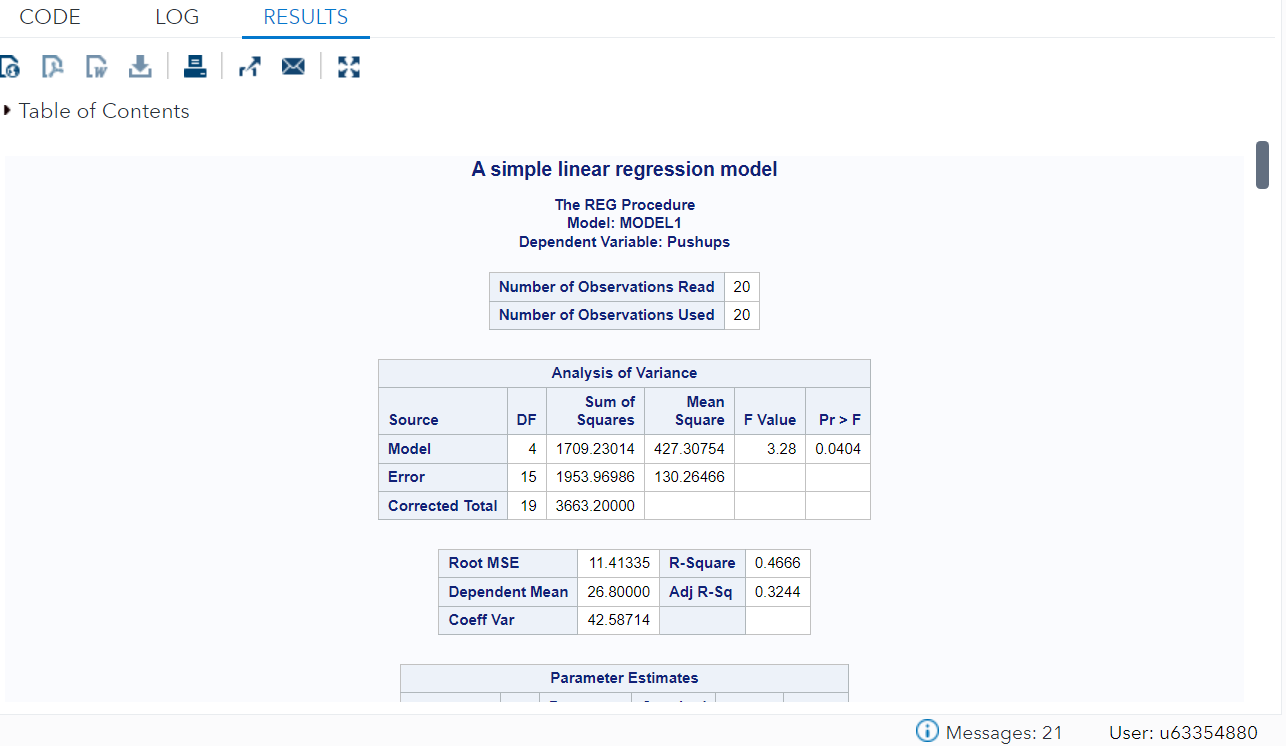

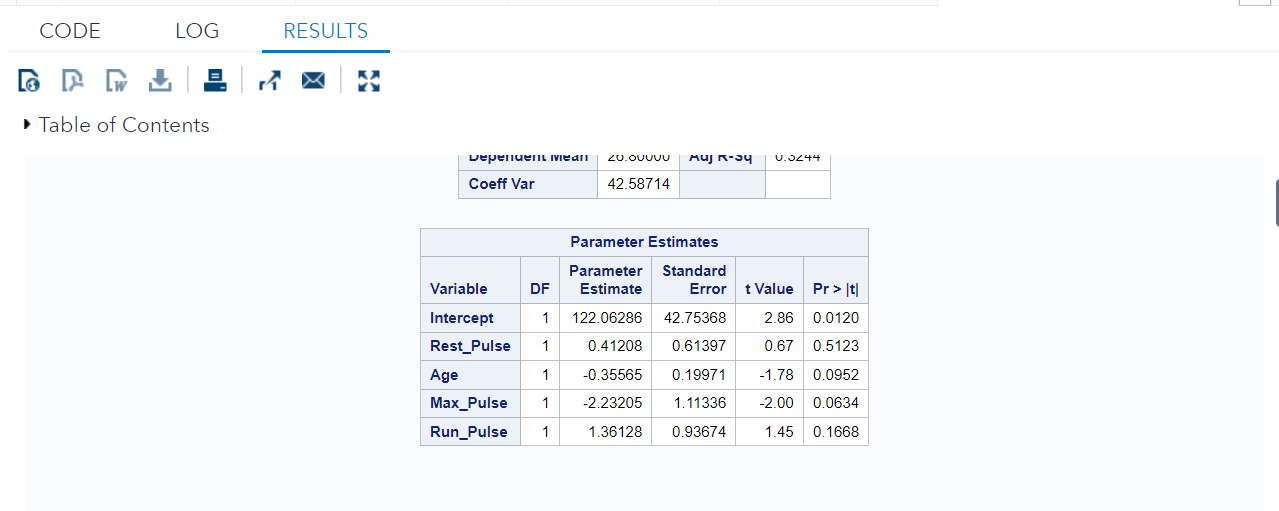